# Logistic regression

Many problems require a probability estimate as output. __Logistic regression__ is an extremely efficiente mechanism for calculating probabilities. Pracically speaking, you can use the returned probability in either of the following two ways:

* Applied "as is". For example, if a spam-prediction model takes an email as input and outputs a value of `0.932`, this implies a `93.2%` probability that the email is spam.
* Converted to a __binary category__ such as `True` or `False`, `Spam` or `Not Spam`.


__Sigmoid function__

The standard logistic function, also known as the __sigmoif function__ (_sigmoid_ means "s-shaped"), has the formula:

$$f(x)=\frac{1}{1+e^{-x}}$$

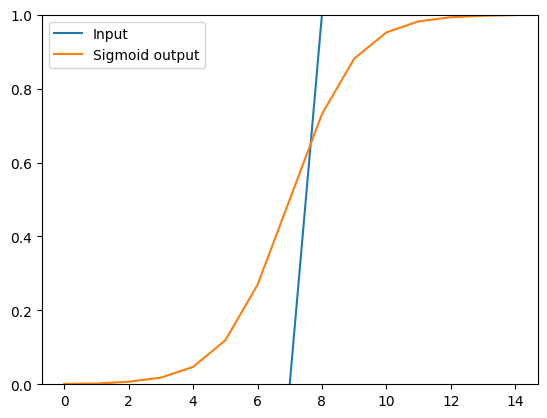

In [44]:
#	Sigmoid output
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({
    "Input":[-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7],
    "Sigmoid output":[0.001,0.002,0.007,0.018,0.047,0.119,0.269,0.500,0.731,0.881,0.952,0.982,0.993,0.997,0.999]
})

data.plot(kind='line')
plt.ylim(top=1, bottom=0)
plt.show()

### Transforming linear output using the sigmoid function

The following equation represents the linear component of a logistic regression model:

$$z=b+w_1x_1+w_2x_2+...+w_Nx_N$$

where:

* $z$ is the output of the linear equation, also called the __log odds__.
* $b$ is the bias.
* The $w$ values are the model´s learned weights.
* The $x$ values are the feature values for a particular example.

To obtainn the logistic regression prediction, the $z$ values is then passed to the sigmoid functionm yielding a value (a probability) between 0 and 1:

$$y'=\frac{1}{1+e^{-e}}$$

where:

* $y'$ is the output of the logistic regression model.
* $z$ is the linear output (as calculated in the preceding equation).

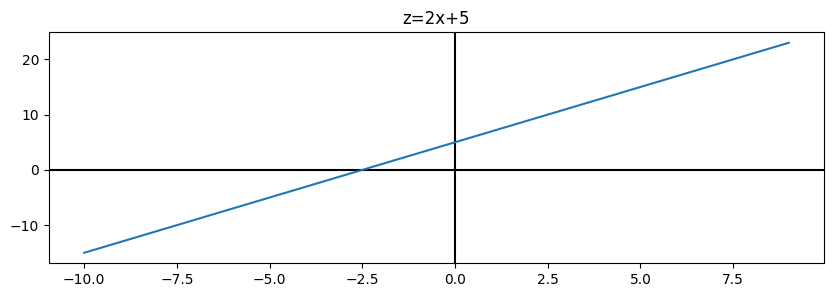

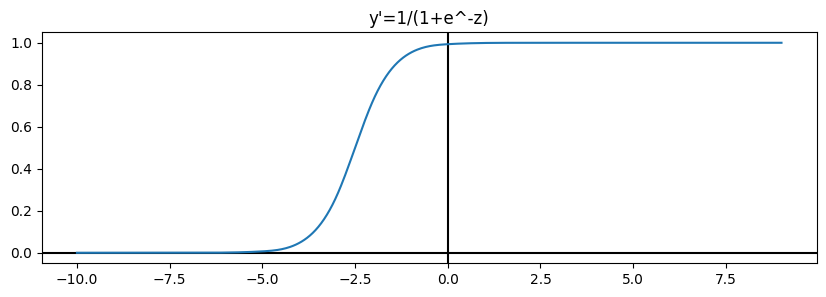

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import make_interp_spline

data = pd.DataFrame({
    "x":[x for x in range(-10,10,1)]
})

data['2x+5'] = data['x'].map(lambda x: 2*x+5)
plt.figure(figsize=(10,3))
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(data['x'], data['2x+5']) # line
plt.title("z=2x+5")
plt.show()

data["y'=1/(1+e^-z)"] = data['2x+5'].map(lambda z: 1/(1+np.exp(-z)))
plt.figure(figsize=(10,3))
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title("y'=1/(1+e^-z)")
X_Y_Spline = make_interp_spline(data["x"], data["y'=1/(1+e^-z)"])
X_ = np.linspace(data['x'].min(), data['x'].max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
plt.show()


Exercise:

A logistic regression model with three features has the following bias and weights:
$$b=1$$
$$w_1=2$$
$$w_2=-1$$
$$w_3=-5$$

Given the following input values:

$$x_1=0$$
$$x_2=10$$
$$x_3=2$$

* _What is the value of $z$ for these input values?_

The linear equation defined by the weights and bias is $z=1+2x_1 - x_2 + 5x_3$. plugging the input values into the equation produces $z=1+(2)(0)-(10)+(5)(2) = 1$

* _What is the logistic regression prediction for these input values?_

The log-odds for the input values is $1$. Plugging that value for $z$ into the sigmoid function:

$$y=\frac{1}{1+e^{-z}}=\frac{1}{1+e^{-1}}=\frac{1}{1+0.367}=\frac{1}{1.367}=0.731$$


ref: https://developers.google.com/machine-learning/crash-course/logistic-regression/sigmoid-function